1. Create a database that has the list of information on hardware parts and specs since 2018. Include valuable information for the following categories (OS generations, CPU, GPU, RAM, storage) include important specs including the year of manufacture, specs and cost.

In [ ]:
pip install mysql.connector

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import mysql.connector

Establish connection to mysql

In [291]:
db = mysql.connector.connect(
    host = "localhost",
    user = "root",
    password = "",
    database = "hardwarepartsproject"
)

cursor = db.cursor()
print("Connected to MYSQL database successfully")

Connected to MYSQL database successfully


# Add tables to the database

In [3]:
# # OS Table
# create_table_query = """
# CREATE TABLE OS (
#     ID INT AUTO_INCREMENT PRIMARY KEY,
#     Name VARCHAR(255) NOT NULL,
#     Price DECIMAL(10, 2),
#     Model BIT,
#     MAX_MEMORY INT,
#     Year_of_Manufacture YEAR
# );
# """

# # execute the querry to create the table
# cursor.execute(create_table_query)

# # commit the changes
# db.commit()

# print("Table created successfully.")

In [4]:
# # RAM table
# create_ram_table_query = """
# CREATE TABLE RAM (
#     ID INT AUTO_INCREMENT PRIMARY KEY,  
#     Name VARCHAR(255) NOT NULL,
#     Price DECIMAL(10, 2),               
#     Year YEAR,                          
#     Manufacturer VARCHAR(255),          
#     MPN VARCHAR(255),                   
#     RAM_Type VARCHAR(50),               
#     Size INT,                           
#     Clock INT,               
#     Sticks INT                          
# );
# """

# # Execute the query to create the RAM table
# cursor.execute(create_ram_table_query)

# # Commit the changes
# db.commit()

# print("RAM table created successfully.")


In [5]:
# # SQL query to create the SSD table
# create_ssd_table_query = """
# CREATE TABLE SSD (
#     ID INT AUTO_INCREMENT PRIMARY KEY, 
#     Manufacturer VARCHAR(255),          
#     Product_Name VARCHAR(255) NOT NULL, 
#     Year YEAR,                          
#     Price DECIMAL(10, 2),               
#     Model_Number VARCHAR(255),          
#     Form_Factor VARCHAR(50),            
#     Interface VARCHAR(50),              
#     Capacity INT,                       
#     NAND_Type VARCHAR(50),              
#     Controller VARCHAR(255)             
# );
# """

# # Execute the query to create the SSD table
# cursor.execute(create_ssd_table_query)

# # Commit the changes
# db.commit()

# print("SSD table created successfully.")

In [6]:
# # SQL query to create the HDD table
# create_hdd_table_query = """
# CREATE TABLE HDD (
#     ID INT AUTO_INCREMENT PRIMARY KEY,  
#     Manufacturer VARCHAR(255),          
#     Product_Name VARCHAR(255) NOT NULL, 
#     Release_Year YEAR,                  
#     Price DECIMAL(10, 2),               
#     Model_Number VARCHAR(255),          
#     Form_Factor VARCHAR(50),            
#     Capacity INT,                       
#     RPM INT,                            
#     Cache INT                           
# );
# """

# # Execute the query to create the HDD table
# cursor.execute(create_hdd_table_query)

# # Commit the changes
# db.commit()

# print("HDD table created successfully.")


In [7]:
# # GPU table
# create_gpu_table_query = """
# CREATE TABLE GPU (
#     ID INT AUTO_INCREMENT PRIMARY KEY,  
#     Manufacturer VARCHAR(255),          
#     Product_Name VARCHAR(255) NOT NULL, 
#     Release_Year YEAR,                  
#     Price VARCHAR(255),                 
#     Mem_Size INT,                       
#     Mem_Bus_Width INT,                  
#     GPU_Clock DECIMAL(5, 2),            
#     Mem_Clock DECIMAL(5, 2),            
#     Unified_Shader INT,                 
#     TMU INT,                            
#     ROP INT,                            
#     IGP VARCHAR(255),                   
#     Bus VARCHAR(50),                    
#     Mem_Type VARCHAR(50),               
#     GPU_Chip VARCHAR(255),              
#     Estimated_Price VARCHAR(255)        
# );
# """

# # Execute the query to create the GPU table
# cursor.execute(create_gpu_table_query)

# # Commit the changes
# db.commit()

# print("GPU table created successfully.")


In [8]:
# create_cpu_table_query = """
# CREATE TABLE CPU (
#     ID INT AUTO_INCREMENT PRIMARY KEY,   
#     Name VARCHAR(255) NOT NULL,           
#     Price VARCHAR(255),                   
#     Year YEAR,                            
#     Producer VARCHAR(255),                
#     MPN VARCHAR(255),                     
#     Base_Clock DECIMAL(5, 2),             
#     Turbo_Clock DECIMAL(5, 2),            
#     Unlocked_Multiplier BOOLEAN,          
#     Cores INT,                            
#     Threads INT,                          
#     TDP INT,                              
#     Socket VARCHAR(255),                  
#     Integrated_GPU BOOLEAN                
# );
# """

# # Execute the query to create the CPU table
# cursor.execute(create_cpu_table_query)

# # Commit the changes
# db.commit()

# # Keep the connection open for further operations (you can add more tables or queries)
# print("CPU table created successfully.")

# Fetch Data from tables

In [9]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [292]:
import pandas as pd

# function to fetch data from the tables
def fetch_data(table):
    cursor.execute(f"SELECT * FROM {table}")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    return pd.DataFrame(data, columns=columns)

cpu_df = fetch_data("cpu")
gpu_df = fetch_data("gpu")
hdd_df = fetch_data("hdd")
os_df = fetch_data("os")
ram_df = fetch_data("ram")
ssd_df = fetch_data("ssd")

In [286]:
print("CPU DATA:\n", cpu_df.head())
print("GPU Data:\n", gpu_df.head())
print("HDD Data:\n", hdd_df.head())
print("OS DAta:\n", os_df.head())
print("RAM Data:\n", ram_df.head())
print("SSD Data:\n", ssd_df.head())

CPU DATA:
    ID                  Name        Price  Year Producer               MPN  \
0   1     AMD Ryzen 5 5600G  $122.59 USD  2022      AMD  100-100000252BOX   
1   2      AMD Ryzen 5 4500  $126.93 USD  2022      AMD  100-100000644BOX   
2   3   Intel Core i3-13100  $137.81 USD  2023    Intel      BX8071513100   
3   4  Intel Core i5-12400F  $144.35 USD  2022    Intel     BX8071512400F   
4   5      AMD Ryzen 5 5600  $133.46 USD  2022      AMD  100-100000927BOX   

  Base_Clock Turbo_Clock  Unlocked_Multiplier  Cores  Threads  TDP Socket  \
0       3.90        4.40                    0      6       12   65    AM4   
1       3.60        4.10                    0      6       12   65    AM4   
2       3.40        0.00                    0      4        8   60   1700   
3       2.50        4.40                    0      6       12   65   1700   
4       3.50        4.40                    0      6       12   65    AM4   

   Integrated_GPU  
0               0  
1               0  
2  

# CPU

CPU STATISTICS

In [287]:
print(cpu_df.columns)

Index(['ID', 'Name', 'Price', 'Year', 'Producer', 'MPN', 'Base_Clock',
       'Turbo_Clock', 'Unlocked_Multiplier', 'Cores', 'Threads', 'TDP',
       'Socket', 'Integrated_GPU'],
      dtype='object')


In [293]:
cpu_query = "SELECT Base_Clock, Cores, Threads, TDP, Year FROM cpu;"
df_cpu = pd.read_sql(cpu_query, db)
print(f"Size of the original DataFrame: {df_cpu.shape}")

Size of the original DataFrame: (246, 5)


C:\Users\glori\AppData\Local\Temp\ipykernel_19124\4200865474.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_cpu = pd.read_sql(cpu_query, db)


In [294]:
df_cpu.columns

Index(['Base_Clock', 'Cores', 'Threads', 'TDP', 'Year'], dtype='object')

In [295]:
years = df_cpu['Year'].unique()
years

array([2022, 2023, 2024, 2019, 2018, 2020, 2021])

In [296]:
# Create separate DataFrames for each year
df_dict_cpu = {}

for year in years:
    # filter the data for the specific year
    df_year_cpu = df_cpu[df_cpu['Year'] == year]

    # Clean the data
    df_year_cpu_clean = df_year_cpu[(['Base_Clock'] != 0) & (df_year_cpu['Cores'] != 0) & (df_year_cpu['Threads'] != 0) & (df_year_cpu['TDP'] != 0)] 

    df_dict_cpu[year] = df_year_cpu_clean

    print(f"Size of the DataFrame for {year}: {df_dict_cpu[year].shape}")

Size of the DataFrame for 2022: (115, 5)
Size of the DataFrame for 2023: (13, 5)
Size of the DataFrame for 2024: (7, 5)
Size of the DataFrame for 2019: (15, 5)
Size of the DataFrame for 2018: (59, 5)
Size of the DataFrame for 2020: (7, 5)
Size of the DataFrame for 2021: (29, 5)


In [297]:
df_year_cpu_clean.head()

,Base_Clock,Cores,Threads,TDP,Year
140,3.4,4,8,58,2021
141,3.5,6,12,65,2021
145,3.4,4,8,60,2021
146,2.5,6,12,65,2021
155,3.7,6,12,65,2021


In [298]:
years = cpu_df['Year'].unique()
years

array([2022, 2023, 2024, 2019, 2018, 2020, 2021])

In [311]:
import pandas as pd

# Prepare an empty dictionary to store the statistics for each year
years = sorted(df_dict_cpu.keys())  # Get sorted years from the dictionary

# Prepare a dictionary to store statistics for each year
stats_dict_cpu = {
    'Year': [],
    'Base_Clock_mean': [], 'Base_Clock_median': [], 'Base_Clock_mode': [], 'Base_Clock_range': [], 'Base_Clock_std': [],
    'Cores_mean': [], 'Cores_median': [], 'Cores_mode': [], 'Cores_range': [], 'Cores_std': [],
    'Threads_mean': [], 'Threads_median': [], 'Threads_mode': [], 'Threads_range': [], 'Threads_std': [],
    'TDP_mean': [], 'TDP_median': [], 'TDP_mode': [], 'TDP_range': [], 'TDP_std': []
}

# Specifications to calculate statistics for
specifications = ['Base_Clock', 'Cores', 'Threads', 'TDP']

# Loop through each year in the dictionary and collect statistics
for year in years:
    df_year_cpu_clean = df_dict_cpu[year]
    year = int(year)
    
    # Append the year
    stats_dict_cpu['Year'].append(year)

    # For each specification, calculate the desired statistics
    for spec in specifications:
        stats_dict_cpu[f'{spec}_mean'].append(df_year_cpu_clean[spec].mean())
        stats_dict_cpu[f'{spec}_median'].append(df_year_cpu_clean[spec].median())
        stats_dict_cpu[f'{spec}_mode'].append(df_year_cpu_clean[spec].mode().iloc[0])  # Taking the first mode value
        stats_dict_cpu[f'{spec}_range'].append(df_year_cpu_clean[spec].max() - df_year_cpu_clean[spec].min())
        stats_dict_cpu[f'{spec}_std'].append(df_year_cpu_clean[spec].std())


# Convert the stats dictionary to a DataFrame
df_stats_cpu = pd.DataFrame(stats_dict_cpu)

# Function to print the table in a readable format
print("CPU STATS")
def print_table(stat_name):
    print(f"\n{stat_name} Stats:")
    print(f"Year\tMean\t\tMedian\t\tMode\t\tRange\t\tStd Dev")
    for index, row in df_stats_cpu.iterrows():
        print(f"{int(row['Year'])}\t"
              f"{row[f'{stat_name}_mean']:.4g}\t\t"
              f"{row[f'{stat_name}_median']:.4g}\t\t"
              f"{row[f'{stat_name}_mode']:.4g}\t\t"
              f"{row[f'{stat_name}_range']:.4g}\t\t"
              f"{row[f'{stat_name}_std']:.4g}")

# Display tables for each stat
for spec in ['Base_Clock', 'Cores', 'Threads', 'TDP']:
    print_table(spec)


CPU STATS

Base_Clock Stats:
Year	Mean		Median		Mode		Range		Std Dev
2018	3.576		3.6		3.5		1.6		0.3593
2019	3.5		3.6		3.6		1		0.3381
2020	3.443		3.6		3.6		1.1		0.4036
2021	3.372		3.4		3.4		1.9		0.5271
2022	3.441		3.5		3.6		2.6		0.5459
2023	3.6		3.7		2.5		2		0.6442
2024	3.086		3.2		2		2.3		0.9599

Cores Stats:
Year	Mean		Median		Mode		Range		Std Dev
2018	5.831		6		4		14		3.41
2019	6		6		6		6		1.69
2020	12.29		8		8		26		9.268
2021	7.586		6		8		28		4.939
2022	6.278		6		6		10		1.926
2023	8.923		8		6		12		4.212
2024	59.71		24		6		138		60.82

Threads Stats:
Year	Mean		Median		Mode		Range		Std Dev
2018	10.85		8		8		30		7.232
2019	9.2		6		6		16		5.116
2020	24.57		16		16		52		18.54
2021	15.17		12		16		56		9.878
2022	12.49		12		12		22		4.023
2023	17.85		16		12		24		8.425
2024	115.4		32		12		276		124.9

TDP Stats:
Year	Mean		Median		Mode		Range		Std Dev
2018	92.83		65		65		185		41.5
2019	78.67		65		65		75		22.56
2020	148.6		95		65		215		95.21
2021	83.38		65		65		222		44.78
2022	88.17		65		65		124

CPU VISUALIZATION

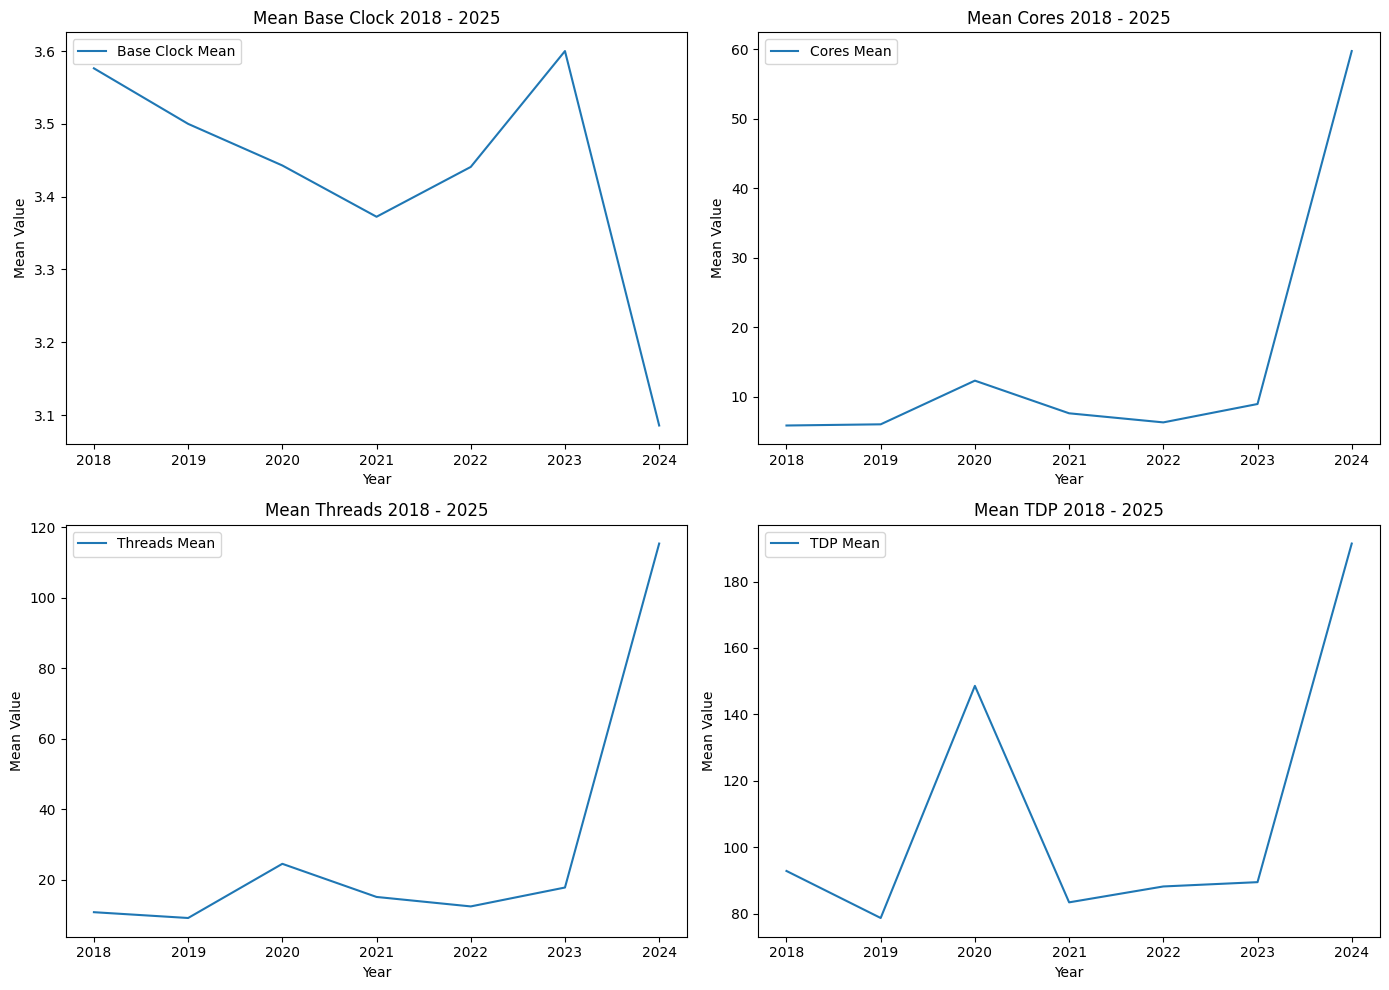

In [306]:
import matplotlib.pyplot as plt

# Plotting the statistics for CPU specs
plt.figure(figsize=(14, 10))

# Plotting Mean values
plt.subplot(2, 2, 1)
plt.plot(df_stats_cpu['Year'], df_stats_cpu['Base_Clock_mean'], label="Base Clock Mean")
plt.title('Mean Base Clock 2018 - 2025')
plt.xlabel('Year')
plt.ylabel('Mean Value')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(df_stats_cpu['Year'], df_stats_cpu['Cores_mean'], label="Cores Mean")
plt.title('Mean Cores 2018 - 2025')
plt.xlabel('Year')
plt.ylabel('Mean Value')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(df_stats_cpu['Year'], df_stats_cpu['Threads_mean'], label="Threads Mean")
plt.title('Mean Threads 2018 - 2025')
plt.xlabel('Year')
plt.ylabel('Mean Value')
plt.legend()


plt.subplot(2, 2, 4)
plt.plot(df_stats_cpu['Year'], df_stats_cpu['TDP_mean'], label="TDP Mean")
plt.title('Mean TDP 2018 - 2025')
plt.xlabel('Year')
plt.ylabel('Mean Value')
plt.legend()


# Show the plot
plt.tight_layout()
plt.show()

CPU PREDICTION AND VISUALIZATION 2018 - 2035

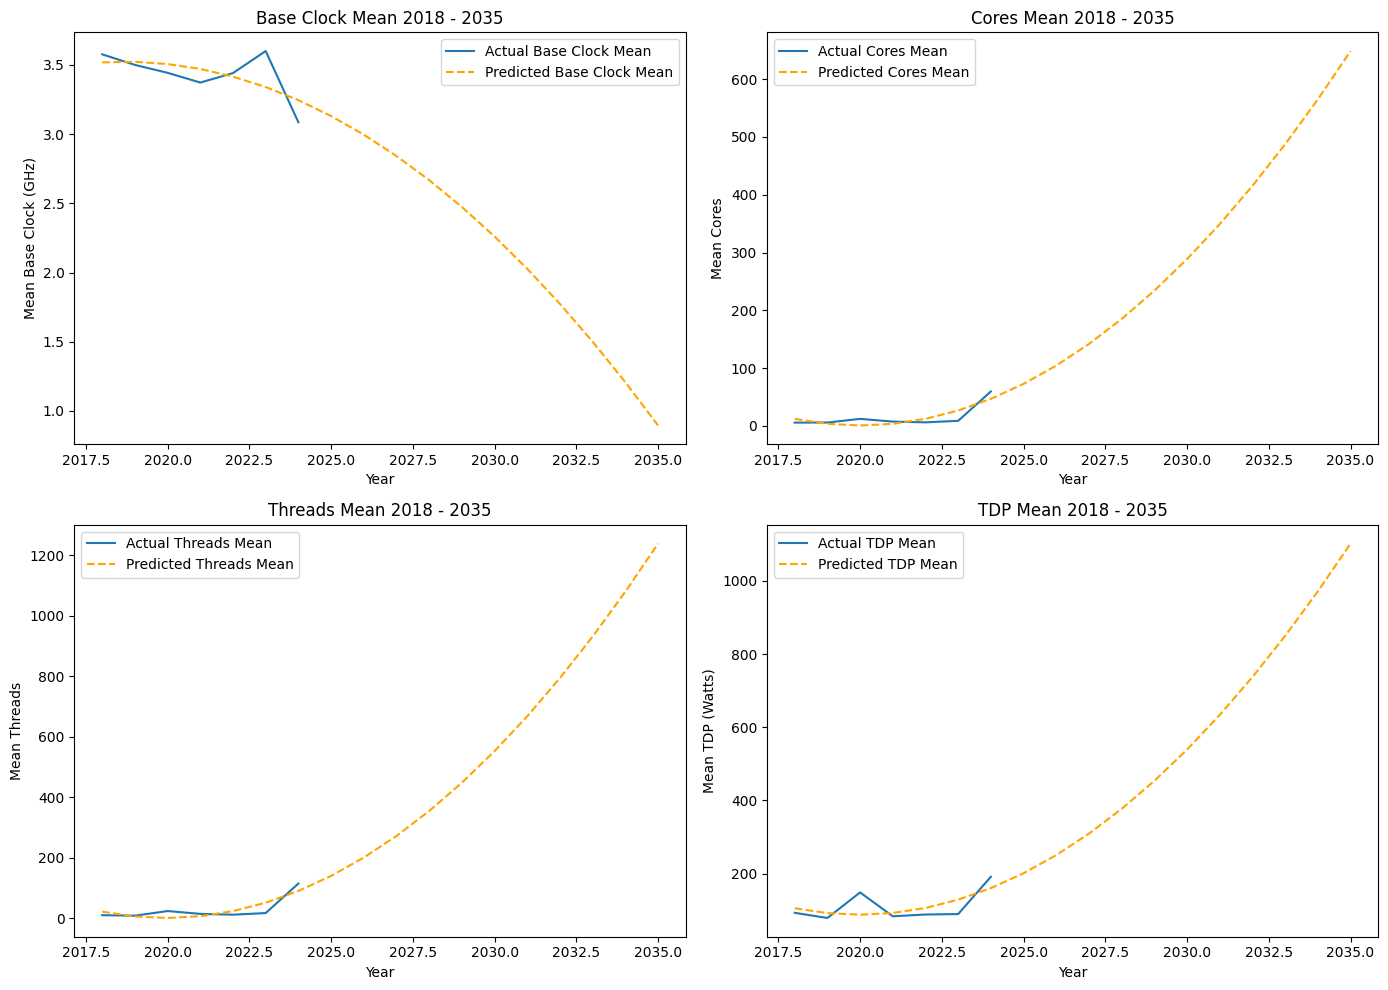

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Prepare data for polynomial regression
X = df_stats_cpu['Year'].values.reshape(-1, 1)  

# Define target variables (Base Clock, Cores, Threads, TDP)
y_base_clock = df_stats_cpu['Base_Clock_mean'].values  
y_cores = df_stats_cpu['Cores_mean'].values
y_threads = df_stats_cpu['Threads_mean'].values
y_tdp = df_stats_cpu['TDP_mean'].values  

degree = 2  
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)

# Fit polynomial regression models for each feature
model_base_clock = LinearRegression().fit(X_poly, y_base_clock)
model_cores = LinearRegression().fit(X_poly, y_cores)
model_threads = LinearRegression().fit(X_poly, y_threads)
model_tdp = LinearRegression().fit(X_poly, y_tdp)

# Predict values for future years (2018-2035)
years_to_predict = np.arange(2018, 2036).reshape(-1, 1)
years_to_predict_poly = poly.transform(years_to_predict)

predicted_base_clock = model_base_clock.predict(years_to_predict_poly)
predicted_cores = model_cores.predict(years_to_predict_poly)
predicted_threads = model_threads.predict(years_to_predict_poly)
predicted_tdp = model_tdp.predict(years_to_predict_poly)

# Plotting the results for CPU Specs
plt.figure(figsize=(14, 10))

# Plotting Mean and Predicted values
plt.subplot(2, 2, 1)
plt.plot(df_stats_cpu['Year'], df_stats_cpu['Base_Clock_mean'], label="Actual Base Clock Mean")
plt.plot(years_to_predict, predicted_base_clock, label="Predicted Base Clock Mean", linestyle='--', color='orange')
plt.title('Base Clock Mean 2018 - 2035')
plt.xlabel('Year')
plt.ylabel('Mean Base Clock (GHz)')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(df_stats_cpu['Year'], df_stats_cpu['Cores_mean'], label="Actual Cores Mean")
plt.plot(years_to_predict, predicted_cores, label="Predicted Cores Mean", linestyle='--', color='orange')
plt.title('Cores Mean 2018 - 2035')
plt.xlabel('Year')
plt.ylabel('Mean Cores')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(df_stats_cpu['Year'], df_stats_cpu['Threads_mean'], label="Actual Threads Mean")
plt.plot(years_to_predict, predicted_threads, label="Predicted Threads Mean", linestyle='--', color='orange')
plt.title('Threads Mean 2018 - 2035')
plt.xlabel('Year')
plt.ylabel('Mean Threads')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(df_stats_cpu['Year'], df_stats_cpu['TDP_mean'], label="Actual TDP Mean")
plt.plot(years_to_predict, predicted_tdp, label="Predicted TDP Mean", linestyle='--', color='orange')
plt.title('TDP Mean 2018 - 2035')
plt.xlabel('Year')
plt.ylabel('Mean TDP (Watts)')
plt.legend()

plt.tight_layout()
plt.show()


GPU STATS

In [20]:
print(gpu_df.columns)

Index(['ID', 'Manufacturer', 'Product_Name', 'Release_Year', 'Mem_Size',
       'Mem_Bus_Width', 'GPU_Clock', 'Mem_Clock', 'Unified_Shader', 'TMU',
       'ROP', 'IGP', 'Bus', 'Mem_Type', 'GPU_Chip', 'Estimated_Price'],
      dtype='object')


In [21]:
years = gpu_df['Release_Year'].unique()
years

array([2025, 2024, 2023, 2022])

In [22]:
gpu_query = "SELECT Mem_Size, GPU_Clock, Unified_Shader, TMU, ROP, Mem_Bus_Width, Release_Year FROM gpu;"
df_gpu = pd.read_sql(gpu_query, db)
print(f"Size of the original DataFrame: {df_gpu.shape}")

Size of the original DataFrame: (198, 7)


C:\Users\glori\AppData\Local\Temp\ipykernel_19124\3927579498.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_gpu = pd.read_sql(gpu_query, db)


In [23]:
df_gpu.columns

Index(['Mem_Size', 'GPU_Clock', 'Unified_Shader', 'TMU', 'ROP',
       'Mem_Bus_Width', 'Release_Year'],
      dtype='object')

In [24]:
# Create separate DataFrames for each year
df_dict_gpu = {}

for year in years:
    # filter the data for the specific year
    df_year_gpu = df_gpu[df_gpu['Release_Year'] == year]

    # Clean the data
    df_year_gpu_clean = df_year_gpu[(['Mem_Size'] != 0) & (df_year_gpu['GPU_Clock'] != 0) & (df_year_gpu['Unified_Shader'] != 0) & (df_year_gpu['TMU'] != 0) & (df_year_gpu['ROP'] !=0) & (df_year_gpu['Mem_Bus_Width'] !=0)] 

    df_dict_gpu[year] = df_year_gpu_clean

    print(f"Size of the DataFrame for {year}: {df_dict_gpu[year].shape}")

Size of the DataFrame for 2025: (6, 7)
Size of the DataFrame for 2024: (17, 7)
Size of the DataFrame for 2023: (74, 7)
Size of the DataFrame for 2022: (70, 7)


In [25]:
df_year_gpu_clean.head()

,Mem_Size,GPU_Clock,Unified_Shader,TMU,ROP,Mem_Bus_Width,Release_Year
127,6,999.99,18176,568,192,96,2022
128,6,999.99,18176,568,192,96,2022
129,6,735.00,18176,568,192,96,2022
130,6,999.99,16896,528,24,96,2022
131,6,999.99,16896,528,24,96,2022


In [120]:
import pandas as pd

# Prepare an empty dictionary to store the statistics for each year
years = sorted(df_dict_gpu.keys())  # Get sorted years from the dictionary

# Prepare a dictionary to store statistics for each year
stats_dict_gpu = {
    'Year': [],
    'Mem_Size_mean': [], 'Mem_Size_median': [], 'Mem_Size_mode': [], 'Mem_Size_range': [], 'Mem_Size_std': [],
    'GPU_Clock_mean': [], 'GPU_Clock_median': [], 'GPU_Clock_mode': [], 'GPU_Clock_range': [], 'GPU_Clock_std': [],
    'Unified_Shader_mean': [], 'Unified_Shader_median': [], 'Unified_Shader_mode': [], 'Unified_Shader_range': [], 'Unified_Shader_std': [],
    'TMU_mean': [], 'TMU_median': [], 'TMU_mode': [], 'TMU_range': [], 'TMU_std': [],
    'ROP_mean': [], 'ROP_median': [], 'ROP_mode': [], 'ROP_range': [], 'ROP_std': [],
    'Mem_Bus_Width_mean': [], 'Mem_Bus_Width_median': [], 'Mem_Bus_Width_mode': [], 'Mem_Bus_Width_range': [], 'Mem_Bus_Width_std': []
}

# Loop through each year in the dictionary and collect statistics
for year in years:
    df_year_gpu_clean = df_dict_gpu[year]  # Cleaned DataFrame for each year
    year = int(year)  # Ensure the year is an integer
    
    # Append the year to the stats dictionary
    stats_dict_gpu['Year'].append(year)
    
    # For each specification (column), calculate the desired statistics
    for spec in ['Mem_Size', 'GPU_Clock', 'Unified_Shader', 'TMU', 'ROP', 'Mem_Bus_Width']:
        stats_dict_gpu[f'{spec}_mean'].append(df_year_gpu_clean[spec].mean())
        stats_dict_gpu[f'{spec}_median'].append(df_year_gpu_clean[spec].median())
        stats_dict_gpu[f'{spec}_mode'].append(df_year_gpu_clean[spec].mode()[0])  # Taking the first mode value
        stats_dict_gpu[f'{spec}_range'].append(df_year_gpu_clean[spec].max() - df_year_gpu_clean[spec].min())
        stats_dict_gpu[f'{spec}_std'].append(df_year_gpu_clean[spec].std())

# Convert the stats dictionary to a DataFrame
df_stats_gpu = pd.DataFrame(stats_dict_gpu)

# Function to print table in a readable format
def print_table(stat_name):
    print(f"\n{stat_name} Stats:")
    print(f"Year\tMean\t\tMedian\t\tMode\t\tRange\t\tStd Dev")
    for index, row in df_stats_gpu.iterrows():
        print(f"{int(row['Year'])}\t"
              f"{row[f'{stat_name}_mean']:.4g}\t\t"
              f"{row[f'{stat_name}_median']:.4g}\t\t"
              f"{row[f'{stat_name}_mode']:.4g}\t\t"
              f"{row[f'{stat_name}_range']:.4g}\t\t"
              f"{row[f'{stat_name}_std']:.4g}")

# Display tables for each stat
for spec in ['Mem_Size', 'GPU_Clock', 'Unified_Shader', 'TMU', 'ROP', 'Mem_Bus_Width']:
    print_table(spec)



Mem_Size Stats:
Year	Mean		Median		Mode		Range		Std Dev
2022	14.83		8		4		78		15.41
2023	27.49		12		8		188		33.96
2024	33.76		12		16		284		69.29
2025	13.33		10		8		20		7.866

GPU_Clock Stats:
Year	Mean		Median		Mode		Range		Std Dev
2022	940.2		1000		1000		490		128.4
2023	972.8		1000		1000		505		80.62
2024	933.5		1000		1000		310		113.1
2025	966.7		1000		1000		99.99		51.63

Unified_Shader Stats:
Year	Mean		Median		Mode		Range		Std Dev
2022	7951		6912		5888		1.408e+04		3786
2023	6691		5120		4096		1.408e+04		3554
2024	8162		5120		4608		1.587e+04		5110
2025	5675		4864		4608		3584		1522

TMU Stats:
Year	Mean		Median		Mode		Range		Std Dev
2022	297		260		184		416		109.7
2023	281.4		284		320		440		104.3
2024	314.4		288		288		496		150.6
2025	264		272		144		288		110.3

ROP Stats:
Year	Mean		Median		Mode		Range		Std Dev
2022	100.6		96		96		168		39.16
2023	101.8		96		96		168		40.34
2024	101.2		96		80		168		51.22
2025	122.7		128		48		144		64.53

Mem_Bus_Width Stats:
Year	Mean		Median		Mode		Range		

GPU VISUALIZATION

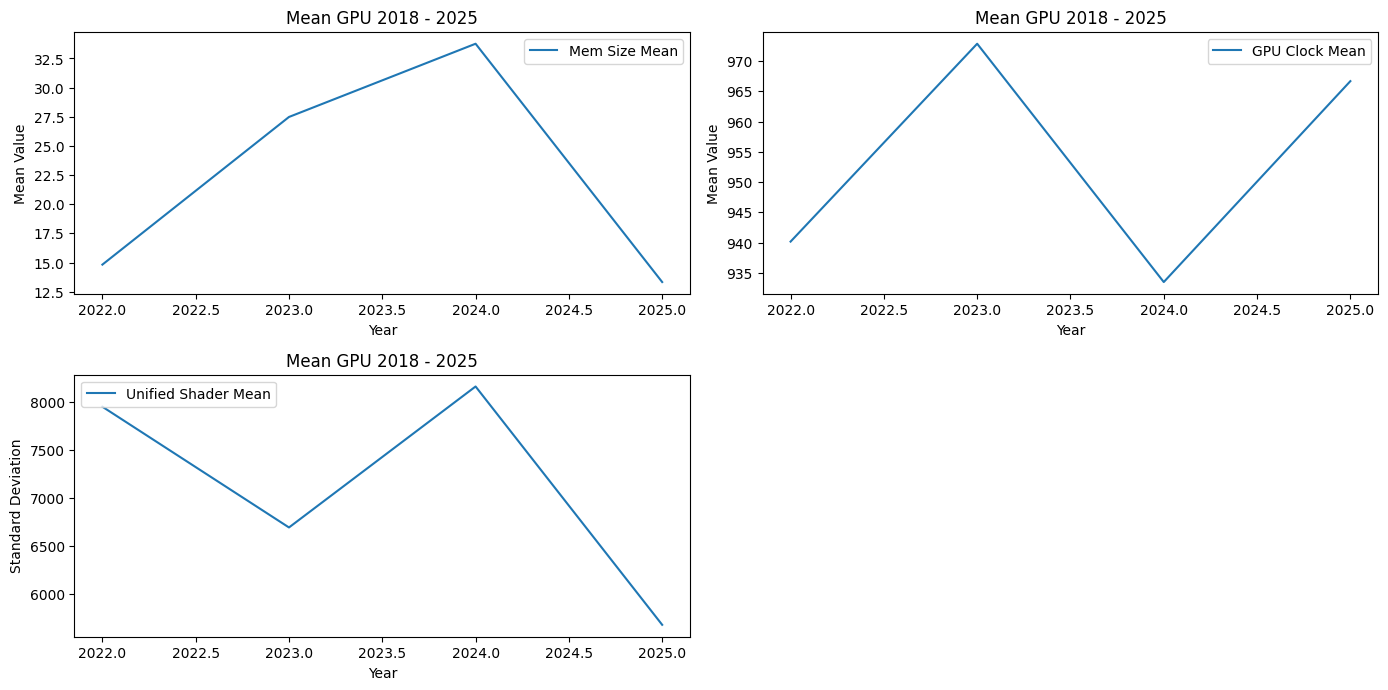

In [320]:
import matplotlib.pyplot as plt

# Plotting the statistics for GPU specs
plt.figure(figsize=(14, 10))

# Plotting Mean values
plt.subplot(3, 2, 1)
plt.plot(df_stats_gpu['Year'], df_stats_gpu['Mem_Size_mean'], label="Mem Size Mean")
plt.title('Mean GPU 2018 - 2025')
plt.xlabel('Year')
plt.ylabel('Mean Value')
plt.legend()

# Plotting Median values
plt.subplot(3, 2, 2)
plt.plot(df_stats_gpu['Year'], df_stats_gpu['GPU_Clock_mean'], label="GPU Clock Mean")
plt.title('Mean GPU 2018 - 2025')
plt.xlabel('Year')
plt.ylabel('Mean Value')
plt.legend()

# Plotting Standard Deviation
plt.subplot(3, 2, 3)
plt.plot(df_stats_gpu['Year'], df_stats_gpu['Unified_Shader_mean'], label="Unified Shader Mean")
plt.title('Mean GPU 2018 - 2025')
plt.xlabel('Year')
plt.ylabel('Standard Deviation')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


# OPERATING SYSTEMS

STATISTICS

In [27]:
print(os_df.columns)

Index(['ID', 'Name', 'Price', 'Model', 'MAX_MEMORY', 'Year_of_Manufacture'], dtype='object')


In [28]:
years = os_df['Year_of_Manufacture'].unique()
years

array([2021, 2018, 2019, 2020, 2022, 2023, 2024])

In [29]:
os_query = "SELECT MAX_MEMORY, Year_of_Manufacture FROM os;"
df_os = pd.read_sql(os_query, db)
print(f"Size of the original DataFrame: {df_os.shape}")

Size of the original DataFrame: (117, 2)


C:\Users\glori\AppData\Local\Temp\ipykernel_19124\2546450561.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_os = pd.read_sql(os_query, db)


In [30]:
df_os.head()

,MAX_MEMORY,Year_of_Manufacture
0,128,2021
1,2048,2021
2,128,2021
3,2048,2021
4,128,2021


In [31]:
print(df_os.columns)

Index(['MAX_MEMORY', 'Year_of_Manufacture'], dtype='object')


In [32]:
# Create separate DataFrames for each year
df_dict_os = {}

for year in years:
    # filter the data for the specific year
    df_year_os = df_os[df_os['Year_of_Manufacture'] == year]

    
    df_dict_os[year] = df_year_os

    print(f"Size of the DataFrame for {year}: {df_dict_os[year].shape}")

Size of the DataFrame for 2021: (26, 2)
Size of the DataFrame for 2018: (21, 2)
Size of the DataFrame for 2019: (19, 2)
Size of the DataFrame for 2020: (18, 2)
Size of the DataFrame for 2022: (14, 2)
Size of the DataFrame for 2023: (13, 2)
Size of the DataFrame for 2024: (6, 2)


In [312]:
import pandas as pd

# Prepare an empty dictionary to store the statistics for each year
years = sorted(df_dict_os.keys())  # Get sorted years from the dictionary

# Prepare a dictionary to store statistics for each year
stats_dict_os = {
    'Year': [],
    'Max_Memory_mean': [], 'Max_Memory_median': [], 'Max_Memory_mode': [], 'Max_Memory_range': [], 'Max_Memory_std': []
}

# Loop through each year in the dictionary and collect statistics
for year in years:
    df_year_os_clean = df_dict_os[year]
    year = int(year)
    
    # Calculate stats for each category and append to the dictionary
    stats_dict_os['Year'].append(year)
    
    stats_dict_os['Max_Memory_mean'].append(df_year_os_clean['MAX_MEMORY'].mean())
    stats_dict_os['Max_Memory_median'].append(df_year_os_clean['MAX_MEMORY'].median())
    stats_dict_os['Max_Memory_mode'].append(df_year_os_clean['MAX_MEMORY'].mode()[0])
    stats_dict_os['Max_Memory_range'].append(df_year_os_clean['MAX_MEMORY'].max() - df_year_os_clean['MAX_MEMORY'].min())
    stats_dict_os['Max_Memory_std'].append(df_year_os_clean['MAX_MEMORY'].std())

# Convert the stats dictionary to a DataFrame
df_stats_os = pd.DataFrame(stats_dict_os)

# Print the statistics for each year
print("OS STATS")
def print_table_os():
    print("\nMax_Memory Stats:")
    print(f"Year\tMean\t\tMedian\t\tMode\t\tRange\t\tStd Dev")
    for index, row in df_stats_os.iterrows():
        print(f"{int(row['Year'])}\t"
              f"{row['Max_Memory_mean']:.4g}\t\t"
              f"{row['Max_Memory_median']:.4g}\t\t"
              f"{row['Max_Memory_mode']:.4g}\t\t"
              f"{row['Max_Memory_range']:.4g}\t\t"
              f"{row['Max_Memory_std']:.4g}")

# Display table for Max_Memory stats
print_table_os()


OS STATS

Max_Memory Stats:
Year	Mean		Median		Mode		Range		Std Dev
2018	391.6		128		128		2032		693.7
2019	116.2		128		128		112		35.31
2020	115.6		128		128		112		36.22
2021	340.9		128		128		2032		629.5
2022	112		128		128		112		40.67
2023	128		128		128		0		0
2024	128		128		128		0		0


OS VISUALIZATION 2018-2024

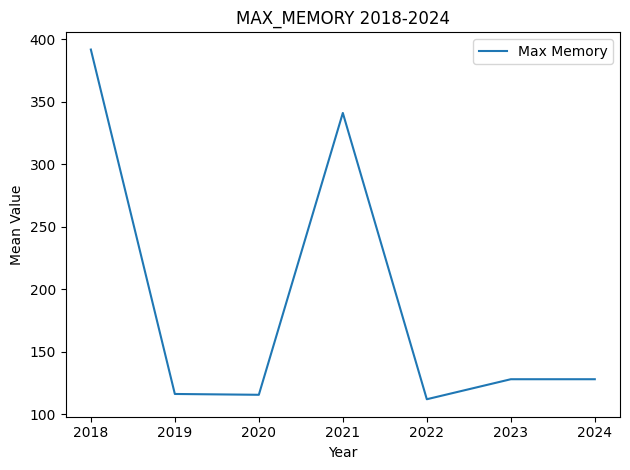

In [257]:
import matplotlib.pyplot as plt

plt.plot(df_stats_os['Year'], df_stats_os['Max_Memory_mean'], label="Max Memory")
plt.title('MAX_MEMORY 2018-2024')
plt.xlabel('Year')
plt.ylabel('Mean Value')
plt.legend()


# Show the plot
plt.tight_layout()
plt.show()


OS PREDICTION AND VISUALIZATION

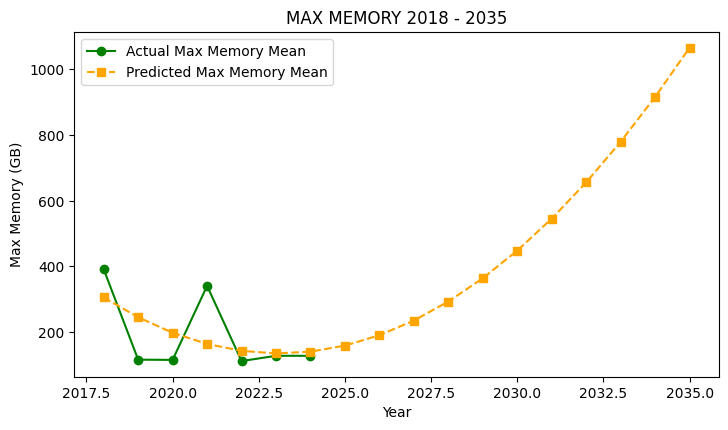

In [263]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Prepare data for polynomial regression
X_os = df_stats_os['Year'].values.reshape(-1, 1)
y_max_memory = df_stats_os['Max_Memory_mean'].values

# Use a lower polynomial degree to avoid overfitting
degree = 2
poly = PolynomialFeatures(degree=degree)
X_os_poly = poly.fit_transform(X_os)

# Fit polynomial regression model for Max Memory Mean
model_max_memory = LinearRegression().fit(X_os_poly, y_max_memory)

# Predict values for future years
years_to_predict_os = np.arange(2018, 2036).reshape(-1, 1)
years_to_predict_os_poly = poly.transform(years_to_predict_os)

predicted_max_memory = model_max_memory.predict(years_to_predict_os_poly)

# Plotting the statistics for MAX_MEMORY and predictions
plt.figure(figsize=(14, 8))

# Plotting Mean values and predictions
plt.subplot(2, 2, 1)
plt.plot(df_stats_os['Year'], df_stats_os['Max_Memory_mean'], label="Actual Max Memory Mean", color='green', marker='o')
plt.plot(years_to_predict_os, predicted_max_memory, label="Predicted Max Memory Mean", color='orange', linestyle='--', marker='s')
plt.title('MAX MEMORY 2018 - 2035')
plt.xlabel('Year')
plt.ylabel('Max Memory (GB)')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


# HARD DISK DRIVES

STATISTICS CALCULATIONS

In [279]:
hdd_df.columns

Index(['ID', 'Manufacturer', 'Product_Name', 'Release_Year', 'Price',
       'Model_Number', 'Form_Factor', 'Capacity', 'RPM', 'Cache',
       'Read_Write_Speed_MBps', 'IOPS', 'Latency_ms'],
      dtype='object')

In [280]:
hdd_df.head()

,ID,Manufacturer,Product_Name,Release_Year,Price,Model_Number,Form_Factor,Capacity,RPM,Cache,Read_Write_Speed_MBps,IOPS,Latency_ms
0,2,Seagate,Enterprise Hard Drive,2018,0.00,ST6000NM0024,"3.5""",6,7200,128,200,100,0.004167
1,3,Seagate,Enterprise Hard Drive,2018,0.00,ST3000NM0033,"3.5""",3,7200,128,200,100,0.004167
2,4,Seagate,Enterprise Hard Drive v5,2018,0.00,ST6000NM0115,"3.5""",6,7200,128,200,100,0.004167
3,5,Seagate,Enterprise NAS Hard Drive,2018,0.00,ST2000VN0001,"3.5""",2,7200,128,200,100,0.004167
4,6,Seagate,Enterprise NAS Hard Drive,2018,0.00,ST4000VN0001,"3.5""",4,7200,128,200,100,0.004167


In [281]:
years = hdd_df['Release_Year'].unique()
years

array([2018, 2019, 2020, 2021, 2022, 2023, 2024])

In [283]:
hdd_query = "SELECT Form_Factor, Capacity, RPM, Cache, Release_Year FROM hdd;"
df_hdd = pd.read_sql(hdd_query, db)
print(f"Size of the original DataFrame: {df_hdd.shape}")

Size of the original DataFrame: (160, 5)


C:\Users\glori\AppData\Local\Temp\ipykernel_19124\2944167775.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_hdd = pd.read_sql(hdd_query, db)


In [38]:
df_hdd.head()

,Form_Factor,Capacity,RPM,Cache,Release_Year
0,"3.5""",6,7200,128,2018
1,"3.5""",3,7200,128,2018
2,"3.5""",6,7200,128,2018
3,"3.5""",2,7200,128,2018
4,"3.5""",4,7200,128,2018


In [39]:
# Create separate DataFrames for each year
df_dict_hdd = {}

for year in years:
    # filter the data for the specific year
    df_year_hdd = df_hdd[df_hdd['Release_Year'] == year]

    # clean the data
    df_year_hdd.loc[:, 'Form_Factor'] = df_year_hdd['Form_Factor'].str.replace('"', '', regex=False).astype(float)
    df_year_hdd_clean = df_year_hdd[(['Capacity'] != 0) & (df_year_hdd['RPM'] != 0) & (df_year_hdd['Cache'] != 0)] 

    
    df_dict_hdd[year] = df_year_hdd_clean

    print(f"Size of the DataFrame for {year}: {df_dict_hdd[year].shape}")

Size of the DataFrame for 2018: (28, 5)
Size of the DataFrame for 2019: (55, 5)
Size of the DataFrame for 2020: (19, 5)
Size of the DataFrame for 2021: (7, 5)
Size of the DataFrame for 2022: (7, 5)
Size of the DataFrame for 2023: (9, 5)
Size of the DataFrame for 2024: (1, 5)


In [313]:
import pandas as pd

# Prepare an empty dictionary to store the statistics for each year
years = sorted(df_dict_hdd.keys())  # Get sorted years from the dictionary

# Prepare a dictionary to store statistics for each year
stats_dict_hdd = {
    'Year': [], 
    'Form_Factor_mean': [], 'Form_Factor_median': [], 'Form_Factor_mode': [], 'Form_Factor_range': [], 'Form_Factor_std': [],
    'Capacity_mean': [], 'Capacity_median': [], 'Capacity_mode': [], 'Capacity_range': [], 'Capacity_std': [],
    'RPM_mean': [], 'RPM_median': [], 'RPM_mode': [], 'RPM_range': [], 'RPM_std': [],
    'Cache_mean': [], 'Cache_median': [], 'Cache_mode': [], 'Cache_range': [], 'Cache_std': []
}

# Specifications to calculate statistics for
specifications = ['Form_Factor', 'Capacity', 'RPM', 'Cache']

# Loop through each year in the dictionary and collect statistics
for year in years:
    df_year_hdd_clean = df_dict_hdd[year]
    year = int(year)
    
    # Append the year
    stats_dict_hdd['Year'].append(year)

    # For each specification, calculate the desired statistics
    for spec in specifications:
        stats_dict_hdd[f'{spec}_mean'].append(df_year_hdd_clean[spec].mean())
        stats_dict_hdd[f'{spec}_median'].append(df_year_hdd_clean[spec].median())
        stats_dict_hdd[f'{spec}_mode'].append(df_year_hdd_clean[spec].mode().iloc[0])  # Taking the first mode value
        stats_dict_hdd[f'{spec}_range'].append(df_year_hdd_clean[spec].max() - df_year_hdd_clean[spec].min())
        stats_dict_hdd[f'{spec}_std'].append(df_year_hdd_clean[spec].std())


# Convert the stats dictionary to a DataFrame
df_stats_hdd = pd.DataFrame(stats_dict_hdd)

# Print the statistics for each year in table format
print("HDD Stats")
def print_table(stat_name):
    print(f"\n{stat_name} Stats:")
    print(f"Year\tMean\t\tMedian\t\tMode\t\tRange\t\tStd Dev")
    for index, row in df_stats_hdd.iterrows():
        print(f"{int(row['Year'])}\t"
              f"{row[f'{stat_name}_mean']:.4g}\t\t"
              f"{row[f'{stat_name}_median']:.4g}\t\t"
              f"{row[f'{stat_name}_mode']:.4g}\t\t"
              f"{row[f'{stat_name}_range']:.4g}\t\t"
              f"{row[f'{stat_name}_std']:.4g}")

# Display tables for each stat
print_table('Form_Factor')
print_table('Capacity')
print_table('RPM')
print_table('Cache')


HDD Stats

Form_Factor Stats:
Year	Mean		Median		Mode		Range		Std Dev
2018	3.464		3.5		3.5		1		0.189
2019	3.391		3.5		3.5		1		0.3146
2020	3.5		3.5		3.5		0		0
2021	3.5		3.5		3.5		0		0
2022	3.5		3.5		3.5		0		0
2023	3.5		3.5		3.5		0		0
2024	3.5		3.5		3.5		0		nan

Capacity Stats:
Year	Mean		Median		Mode		Range		Std Dev
2018	8.143		8		6		14		4.08
2019	5.273		4		1		15		3.592
2020	6.684		6		2		12		4.204
2021	11.43		12		2		16		5.381
2022	12.29		8		6		18		7.952
2023	20		20		20		16		4.796
2024	16		16		16		0		nan

RPM Stats:
Year	Mean		Median		Mode		Range		Std Dev
2018	7025		7200		7200		1800		520.4
2019	6564		7200		7200		1800		854.5
2020	5709		5400		5400		1800		667.3
2021	7200		7200		7200		0		0
2022	6943		7200		7200		1800		680.3
2023	7000		7200		7200		1800		600
2024	7200		7200		7200		0		nan

Cache Stats:
Year	Mean		Median		Mode		Range		Std Dev
2018	205.7		256		256		128		63.66
2019	167.4		128		128		504		105.6
2020	218.9		256		256		448		128.6
2021	338.3		256		256		448		176.1
2022	265.1		256		256		4

VISUALIZATION

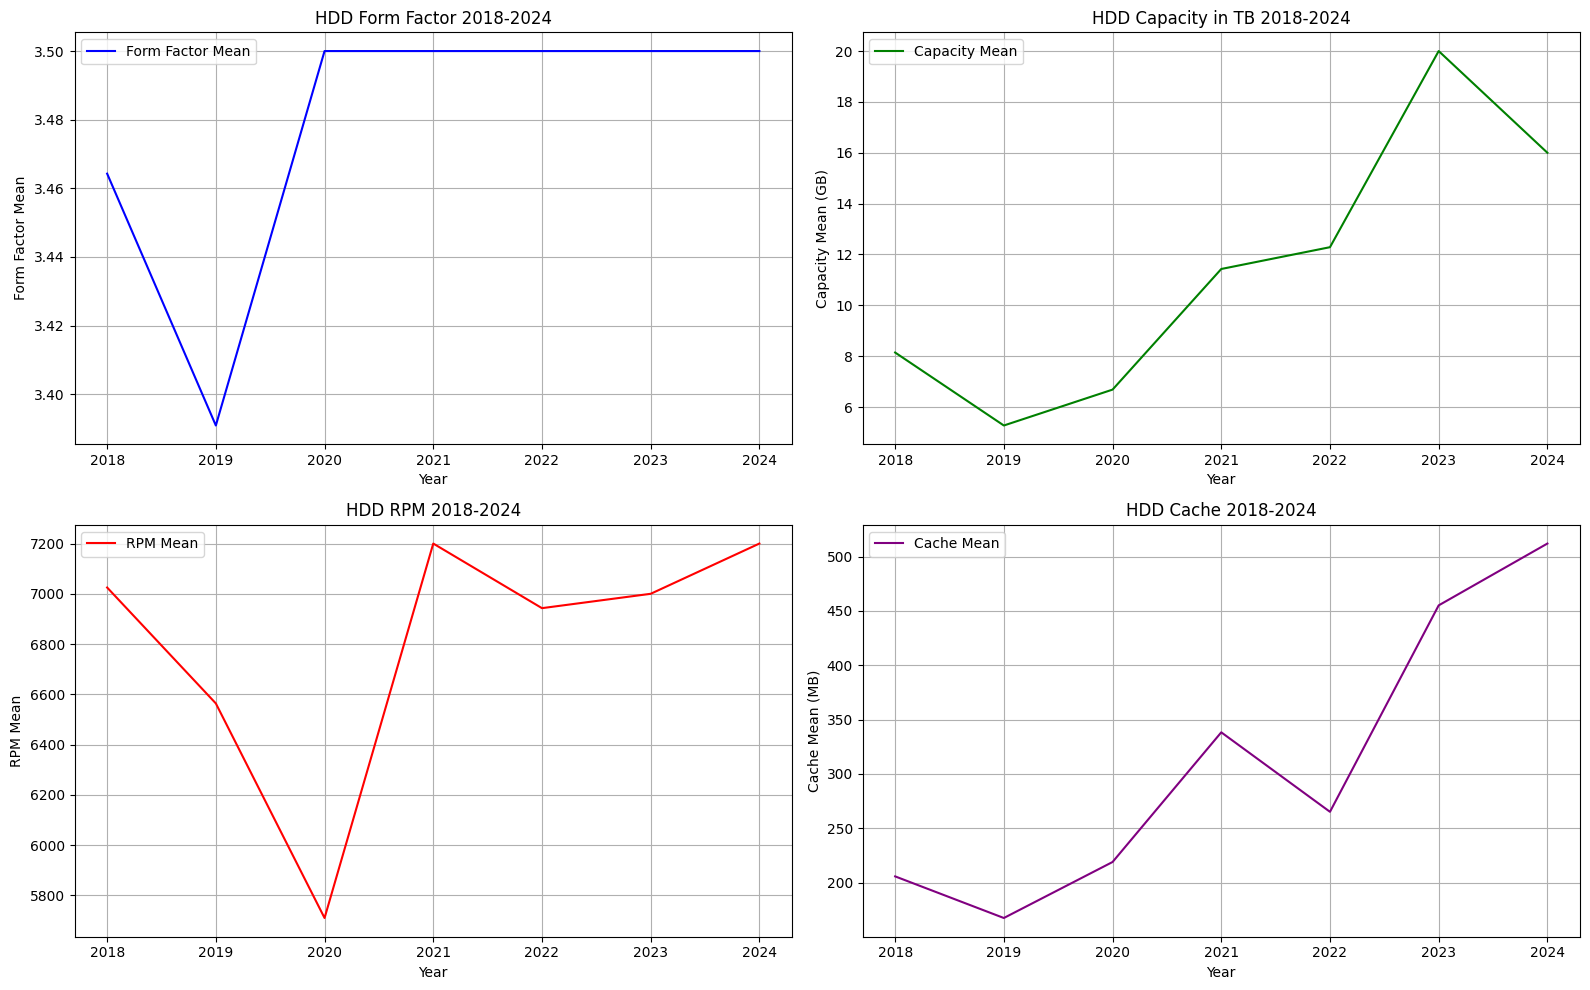

In [271]:
import matplotlib.pyplot as plt

# Create a larger figure with a specific size (adjust as needed)
plt.figure(figsize=(16, 10))

# Create the first plot (Top-left)
plt.subplot(2, 2, 1)
plt.plot(df_stats_hdd['Year'], df_stats_hdd['Form_Factor_mean'], label="Form Factor Mean", color='blue')
plt.title('HDD Form Factor 2018-2024')
plt.xlabel('Year')
plt.ylabel('Form Factor Mean')
plt.legend()
plt.grid(True)

# Create the second plot (Top-right)
plt.subplot(2, 2, 2)
plt.plot(df_stats_hdd['Year'], df_stats_hdd['Capacity_mean'], label="Capacity Mean", color='green')
plt.title('HDD Capacity in TB 2018-2024')
plt.xlabel('Year')
plt.ylabel('Capacity Mean (GB)')
plt.legend()
plt.grid(True)

# Create the third plot (Bottom-left)
plt.subplot(2, 2, 3)
plt.plot(df_stats_hdd['Year'], df_stats_hdd['RPM_mean'], label="RPM Mean", color='red')
plt.title('HDD RPM 2018-2024')
plt.xlabel('Year')
plt.ylabel('RPM Mean')
plt.legend()
plt.grid(True)

# Create the fourth plot (Bottom-right)
plt.subplot(2, 2, 4)
plt.plot(df_stats_hdd['Year'], df_stats_hdd['Cache_mean'], label="Cache Mean", color='purple')
plt.title('HDD Cache 2018-2024')
plt.xlabel('Year')
plt.ylabel('Cache Mean (MB)')
plt.legend()
plt.grid(True)

# Adjust layout to ensure there’s enough space between the plots
plt.tight_layout()
plt.show()


PREDICTION AND VISUALIZATION

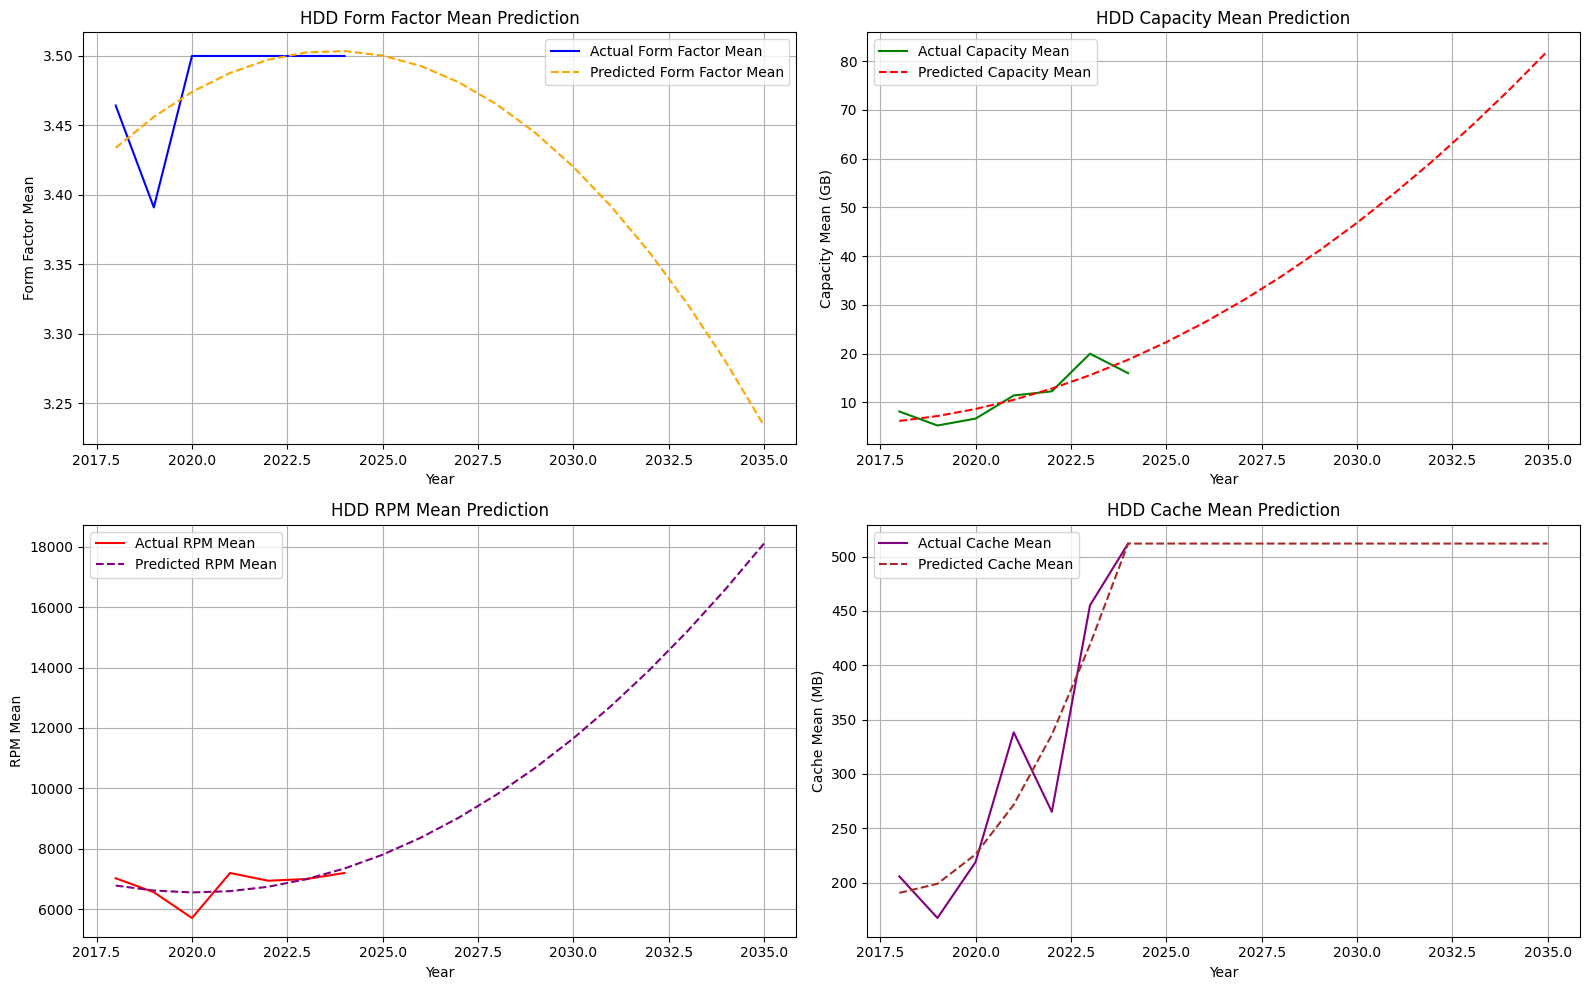

In [272]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Prepare data for polynomial regression
X = df_stats_hdd['Year'].values.reshape(-1, 1)  
y_form_factor = df_stats_hdd['Form_Factor_mean'].values  
y_capacity = df_stats_hdd['Capacity_mean'].values  
y_rpm = df_stats_hdd['RPM_mean'].values  
y_cache = df_stats_hdd['Cache_mean'].values  

# Use a lower polynomial degree to avoid overfitting
degree = 2  
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)

# Fit polynomial regression models for each feature
model_form_factor = LinearRegression().fit(X_poly, y_form_factor)
model_capacity = LinearRegression().fit(X_poly, y_capacity)
model_rpm = LinearRegression().fit(X_poly, y_rpm)
model_cache = LinearRegression().fit(X_poly, y_cache)

# Predict values for future years (2018-2035)
years_to_predict = np.arange(2018, 2036).reshape(-1, 1)
years_to_predict_poly = poly.transform(years_to_predict)

predicted_form_factor = model_form_factor.predict(years_to_predict_poly)
predicted_capacity = model_capacity.predict(years_to_predict_poly)
predicted_rpm = model_rpm.predict(years_to_predict_poly)
predicted_cache = model_cache.predict(years_to_predict_poly)

# Clip values to realistic limits (if necessary)
predicted_capacity = np.clip(predicted_capacity, 0, 10000)  # Limit for Capacity (GB)
predicted_rpm = np.clip(predicted_rpm, 1000, 20000)  # Limit for RPM
predicted_cache = np.clip(predicted_cache, 0, 512)  # Limit for Cache (MB)

# Create a larger figure with a specific size
plt.figure(figsize=(16, 10))

# Create the first plot (Form Factor Prediction)
plt.subplot(2, 2, 1)
plt.plot(df_stats_hdd['Year'], df_stats_hdd['Form_Factor_mean'], label="Actual Form Factor Mean", color='blue')
plt.plot(years_to_predict, predicted_form_factor, label="Predicted Form Factor Mean", color='orange', linestyle='--')
plt.title('HDD Form Factor Mean Prediction')
plt.xlabel('Year')
plt.ylabel('Form Factor Mean')
plt.legend()
plt.grid(True)

# Create the second plot (Capacity Prediction)
plt.subplot(2, 2, 2)
plt.plot(df_stats_hdd['Year'], df_stats_hdd['Capacity_mean'], label="Actual Capacity Mean", color='green')
plt.plot(years_to_predict, predicted_capacity, label="Predicted Capacity Mean", color='red', linestyle='--')
plt.title('HDD Capacity Mean Prediction')
plt.xlabel('Year')
plt.ylabel('Capacity Mean (GB)')
plt.legend()
plt.grid(True)

# Create the third plot (RPM Prediction)
plt.subplot(2, 2, 3)
plt.plot(df_stats_hdd['Year'], df_stats_hdd['RPM_mean'], label="Actual RPM Mean", color='red')
plt.plot(years_to_predict, predicted_rpm, label="Predicted RPM Mean", color='purple', linestyle='--')
plt.title('HDD RPM Mean Prediction')
plt.xlabel('Year')
plt.ylabel('RPM Mean')
plt.legend()
plt.grid(True)

# Create the fourth plot (Cache Prediction)
plt.subplot(2, 2, 4)
plt.plot(df_stats_hdd['Year'], df_stats_hdd['Cache_mean'], label="Actual Cache Mean", color='purple')
plt.plot(years_to_predict, predicted_cache, label="Predicted Cache Mean", color='brown', linestyle='--')
plt.title('HDD Cache Mean Prediction')
plt.xlabel('Year')
plt.ylabel('Cache Mean (MB)')
plt.legend()
plt.grid(True)

# Adjust layout to ensure there’s enough space between the plots
plt.tight_layout()
plt.show()


# SOLID STATE DRIVES 

STATISTICS CALCULATIONS

In [42]:
ssd_df.columns

Index(['ID', 'Manufacturer', 'Product_Name', 'Year', 'Price', 'Model_Number',
       'Form_Factor', 'Interface', 'Capacity', 'NAND_Type', 'Controller'],
      dtype='object')

In [43]:
ssd_df.head()

,ID,Manufacturer,Product_Name,Year,Price,Model_Number,Form_Factor,Interface,Capacity,NAND_Type,Controller
0,1,Crucial,P1 1000 GB,2018,0.00,CT1000P1SSD8,M.2,NVMe,1000,QLC,Silicon Motion SM2263EN
1,2,Gigabyte,UD PRO Series 512 GB,2018,0.00,GP-GSTFS30512GTTD,SATA,SATA,512,TLC,Unknown
2,3,Crucial,MX500 M.2 1000 GB,2018,0.00,CT1000MX500SSD4,M.2,SATA,1000,TLC,Silicon Motion SM2258
3,4,Intel,660P Series 1000 GB,2018,0.00,SSDPEKNW010T8X1,M.2,NVMe,1000,QLC,Silicon Motion SM2263EN
4,5,Intel,760p Series 512 GB,2018,0.00,SSDPEKKW512G8XT,M.2,NVMe,512,TLC,Silicon Motion SM2262


In [44]:
years = ssd_df['Year'].unique()
years

array([2018, 2019, 2020, 2021, 2022, 2023])

In [45]:
ssd_query = "SELECT Capacity, Year FROM ssd;"
df_ssd = pd.read_sql(ssd_query, db)
print(f"Size of the original DataFrame: {df_ssd.shape}")

Size of the original DataFrame: (147, 2)


C:\Users\glori\AppData\Local\Temp\ipykernel_19124\3456898298.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_ssd = pd.read_sql(ssd_query, db)


In [46]:
df_ssd.head()

,Capacity,Year
0,1000,2018
1,512,2018
2,1000,2018
3,1000,2018
4,512,2018


In [47]:
# Create separate DataFrames for each year
df_dict_ssd = {}

for year in years:
    # Filter the data for the specific year
    df_year_ssd = df_ssd[df_ssd['Year'] == year]

    # Store the cleaned DataFrame for the given year
    df_dict_ssd[year] = df_year_ssd

    # Print the size of the cleaned DataFrame for the current year
    print(f"Size of the DataFrame for {year}: {df_dict_ssd[year].shape}")


Size of the DataFrame for 2018: (60, 2)
Size of the DataFrame for 2019: (30, 2)
Size of the DataFrame for 2020: (28, 2)
Size of the DataFrame for 2021: (17, 2)
Size of the DataFrame for 2022: (10, 2)
Size of the DataFrame for 2023: (2, 2)


In [314]:
import pandas as pd

# Prepare an empty dictionary to store the statistics for each year
years = sorted(df_dict_ssd.keys())  # Get sorted years from the dictionary

# Prepare a dictionary to store statistics for each year
stats_dict_ssd = {
    'Year': [],
    'Capacity_mean': [], 'Capacity_median': [], 'Capacity_mode': [], 'Capacity_range': [], 'Capacity_std': []
}

# Function to format numbers to 4 significant figures
def format_value(value):
    if pd.isna(value):  # Handle NaN values
        return "NaN"
    return f"{value:.4g}"  # Format to 4 significant figures

# Loop through each year in the dictionary and collect statistics
for year in years:
    df_year_ssd_clean = df_dict_ssd[year]
    year = int(year)
    
    # Calculate stats for each category and append to the dictionary
    stats_dict_ssd['Year'].append(year)
    
    stats_dict_ssd['Capacity_mean'].append(df_year_ssd_clean['Capacity'].mean())
    stats_dict_ssd['Capacity_median'].append(df_year_ssd_clean['Capacity'].median())
    stats_dict_ssd['Capacity_mode'].append(df_year_ssd_clean['Capacity'].mode()[0])
    stats_dict_ssd['Capacity_range'].append(df_year_ssd_clean['Capacity'].max() - df_year_ssd_clean['Capacity'].min())
    stats_dict_ssd['Capacity_std'].append(df_year_ssd_clean['Capacity'].std())

# Convert the stats dictionary to a DataFrame
df_stats_ssd = pd.DataFrame(stats_dict_ssd)

# Print the statistics for each year with two-tab separation
print("SSD Stats")
print("\nCapacity Stats:")
print("Year\t\tMean\t\tMedian\t\tMode\t\tRange\t\tStd Dev")

for index, row in df_stats_ssd.iterrows():
    year = int(row['Year'])
    print(
        f"{year}\t\t"
        f"{format_value(row['Capacity_mean'])}\t\t"
        f"{format_value(row['Capacity_median'])}\t\t"
        f"{format_value(row['Capacity_mode'])}\t\t"
        f"{format_value(row['Capacity_range'])}\t\t"
        f"{format_value(row['Capacity_std'])}"
    )


SSD Stats

Capacity Stats:
Year		Mean		Median		Mode		Range		Std Dev
2018		618.6		500		1000		1942		515.3
2019		1035		1000		2000		1750		686.2
2020		1630		1000		2000		7760		1582
2021		1809		1000		1000		3750		1374
2022		1800		1500		1000		3500		1295
2023		2500		2500		1000		3000		2121


VISUALIZATION 2018 - 2024

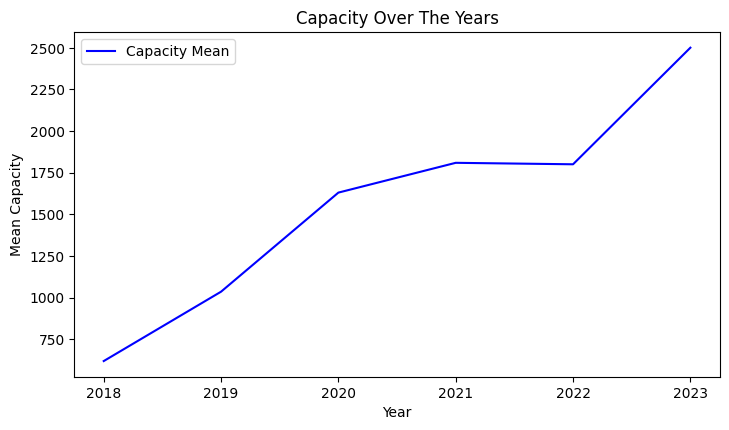

In [273]:
import matplotlib.pyplot as plt

# Plotting the statistics
plt.figure(figsize=(14, 8))

# Plotting Mean values
plt.subplot(2, 2, 1)
plt.plot(df_stats_ssd['Year'], df_stats_ssd['Capacity_mean'], label="Capacity Mean", color='b')
plt.title('Capacity Over The Years')
plt.xlabel('Year')
plt.ylabel('Mean Capacity')
plt.legend()

plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


PREDICTION 2018-2035

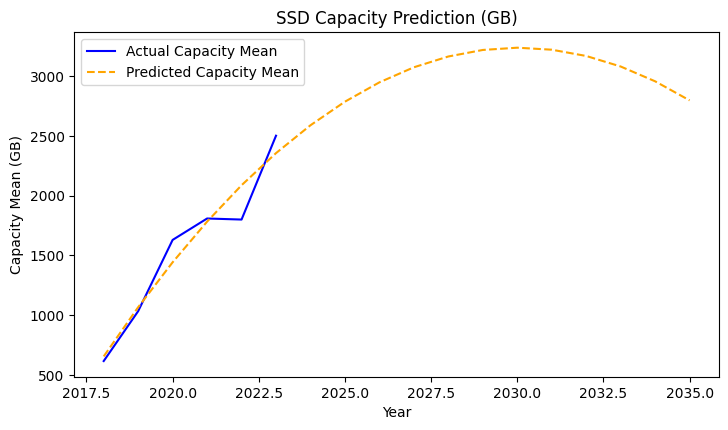

In [275]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Prepare data for polynomial regression
X = df_stats_ssd['Year'].values.reshape(-1, 1)  
y_capacity = df_stats_ssd['Capacity_mean'].values  

# Use a lower polynomial degree to avoid overfitting
degree = 2  
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)

# Fit polynomial regression model for SSD Capacity
model_capacity = LinearRegression().fit(X_poly, y_capacity)

# Predict values for future years (2018-2035)
years_to_predict = np.arange(2018, 2036).reshape(-1, 1)
years_to_predict_poly = poly.transform(years_to_predict)

predicted_capacity = model_capacity.predict(years_to_predict_poly)

# Clip values to realistic limits (if necessary)
predicted_capacity = np.clip(predicted_capacity, 0, 10000)  # Limit for Capacity (GB)

# Plotting the results
plt.figure(figsize=(14, 8))

# Plotting SSD Capacity with prediction
plt.subplot(2, 2, 1)
plt.plot(df_stats_ssd['Year'], df_stats_ssd['Capacity_mean'], label="Actual Capacity Mean", color='b')
plt.plot(years_to_predict, predicted_capacity, label="Predicted Capacity Mean", color='orange', linestyle='--')
plt.title('SSD Capacity Prediction (GB)')
plt.xlabel('Year')
plt.ylabel('Capacity Mean (GB)')
plt.legend()

plt.tight_layout()
plt.show()


# RANDOM ACCESS MEMORY

In [49]:
ram_df.columns

Index(['ID', 'Name', 'Price', 'Year', 'Manufacturer', 'MPN', 'RAM_Type',
       'Size', 'Clock', 'Sticks'],
      dtype='object')

In [50]:
ram_df.head()

,ID,Name,Price,Year,Manufacturer,MPN,RAM_Type,Size,Clock,Sticks
0,1,Kingston Fury Beast,0.00,2021,Kingston,KF548C38BBK2-32,DDR5-4800,32,4800,2
1,2,Corsair Vengeance RGB RT,0.00,2021,Corsair,CMN32GX4M2Z3600C18W,DDR4-3600,32,3600,2
2,3,Corsair Vengeance RGB RT,0.00,2021,Corsair,CMN32GX4M2Z3600C16,DDR4-3600,32,3600,2
3,4,Corsair Vengeance RGB RT,0.00,2021,Corsair,CMN32GX4M2Z3200C16,DDR4-3200,32,3200,2
4,5,G.Skill Trident Z DDR4-3200 16GB,0.00,2019,G.Skill,F4-3200C16D-16GTZSW,DDR4-3200,16,3200,2


In [51]:
ram_query = "SELECT RAM_Type, Size, Clock, Sticks, Year FROM ram;"
df_ram = pd.read_sql(ram_query, db)
print(f"Size of the original DataFrame: {df_ram.shape}")

Size of the original DataFrame: (282, 5)


C:\Users\glori\AppData\Local\Temp\ipykernel_19124\3687900115.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_ram = pd.read_sql(ram_query, db)


In [52]:
df_ram.head()

,RAM_Type,Size,Clock,Sticks,Year
0,DDR5-4800,32,4800,2,2021
1,DDR4-3600,32,3600,2,2021
2,DDR4-3600,32,3600,2,2021
3,DDR4-3200,32,3200,2,2021
4,DDR4-3200,16,3200,2,2019


In [53]:
years = df_ram['Year'].unique()
years

array([2021, 2019, 2020, 2018, 2022, 2023])

In [54]:
# Create separate DataFrames for each year
df_dict_ram = {}

for year in years:
    # Filter the data for the specific year
    df_year_ram = df_ram[df_ram['Year'] == year]

    # Ensure 'RAM_Type' is of type string using .loc
    df_year_ram.loc[:, 'RAM_Type'] = df_year_ram['RAM_Type'].astype(str)

    # Clean the data: Extract the numeric RAM 
    df_year_ram.loc[:, 'RAM_Type'] = df_year_ram['RAM_Type'].str.extract(r'-(\d+)', expand=False).astype(float)

    # Clean the DataFrame to remove rows where RAM_Type, Size, or Sticks are 0 or NaN
    df_year_ram_clean = df_year_ram[(df_year_ram['RAM_Type'] != 0) & 
                                     (df_year_ram['Size'] != 0) & 
                                     (df_year_ram['Sticks'] != 0)] 

    # Store the cleaned DataFrame for the given year
    df_dict_ram[year] = df_year_ram_clean

    # Print the size of the cleaned DataFrame for the current year
    print(f"Size of the DataFrame for {year}: {df_dict_ram[year].shape}")


Size of the DataFrame for 2021: (76, 5)
Size of the DataFrame for 2019: (70, 5)
Size of the DataFrame for 2020: (30, 5)
Size of the DataFrame for 2018: (16, 5)
Size of the DataFrame for 2022: (64, 5)
Size of the DataFrame for 2023: (26, 5)


In [55]:
df_year_ram_clean.head()

,RAM_Type,Size,Clock,Sticks,Year
85,5600.0,48,5600,2,2023
97,7200.0,32,7200,2,2023
98,7000.0,32,7000,2,2023
107,7200.0,32,7200,2,2023
127,7000.0,48,7000,2,2023


In [56]:
print(df_dict_ram[2020].head())


   RAM_Type  Size  Clock  Sticks  Year
5    3600.0    16   3600       2  2020
14   3600.0    16   3600       2  2020
32   3000.0   128   3000       1  2020
48   3600.0     8   3600       2  2020
58   3600.0    32   3600       4  2020


In [237]:
import pandas as pd

# Prepare an empty dictionary to store the statistics for each year
years = sorted(df_dict_ram.keys())  # Get sorted years from the dictionary

# Prepare a dictionary to store statistics for each year
stats_dict_ram = {
    'Year': [],
    'RAM_Type_mean': [], 'RAM_Type_median': [], 'RAM_Type_mode': [], 'RAM_Type_range': [], 'RAM_Type_std': [],
    'Size_mean': [], 'Size_median': [], 'Size_mode': [], 'Size_range': [], 'Size_std': [],
    'Clock_mean': [], 'Clock_median': [], 'Clock_mode': [], 'Clock_range': [], 'Clock_std': [],
    'Sticks_mean': [], 'Sticks_median': [], 'Sticks_mode': [], 'Sticks_range': [], 'Sticks_std': []
}

# Function to format numbers to 4 significant figures
def format_value(value):
    if pd.isna(value):  # Handle NaN values
        return "NaN"
    return f"{value:.4g}"  # Format to 4 significant figures

# List of specifications
specifications = ['RAM_Type', 'Size', 'Clock', 'Sticks']

# Loop through each year in the dictionary and collect statistics
for year in years:
    df_year_ram_clean = df_dict_ram[year]
    year = int(year)
    
    # Append year to stats_dict_ram
    stats_dict_ram['Year'].append(year)
    
    # Loop through each specification to calculate stats
    for spec in specifications:
        stats_dict_ram[f'{spec}_mean'].append(df_year_ram_clean[spec].mean())
        stats_dict_ram[f'{spec}_median'].append(df_year_ram_clean[spec].median())
        stats_dict_ram[f'{spec}_mode'].append(df_year_ram_clean[spec].mode()[0])  # Taking the first mode value
        stats_dict_ram[f'{spec}_range'].append(df_year_ram_clean[spec].max() - df_year_ram_clean[spec].min())
        stats_dict_ram[f'{spec}_std'].append(df_year_ram_clean[spec].std())


# Convert the stats dictionary to a DataFrame
df_stats_ram = pd.DataFrame(stats_dict_ram)

# Print statistics for each RAM specification in separate tables
for spec in ['RAM_Type', 'Size', 'Clock', 'Sticks']:
    print(f"\n{spec} Stats:")
    print("Year\t\tMean\t\tMedian\t\tMode\t\tRange\t\tStd Dev")
    
    for index, row in df_stats_ram.iterrows():
        year = int(row['Year'])
        print(
            f"{year}\t\t"
            f"{format_value(row[f'{spec}_mean'])}\t\t"
            f"{format_value(row[f'{spec}_median'])}\t\t"
            f"{format_value(row[f'{spec}_mode'])}\t\t"
            f"{format_value(row[f'{spec}_range'])}\t\t"
            f"{format_value(row[f'{spec}_std'])}"
        )



RAM_Type Stats:
Year		Mean		Median		Mode		Range		Std Dev
2018		2808		3000		3000		1734		467.1
2019		3092		3000		3200		4667		539.2
2020		3195		3200		3600		2133		536.8
2021		3396		3200		3200		4400		720.6
2022		3985		3600		3600		4867		1144
2023		5454		5600		5200		4534		1375

Size Stats:
Year		Mean		Median		Mode		Range		Std Dev
2018		23		16		16		16		8.198
2019		27.2		32		32		48		9.953
2020		33.33		16		16		120		30.81
2021		44.89		32		32		124		25.51
2022		54.75		64		64		112		23.47
2023		81.85		64		32		160		55.3

Clock Stats:
Year		Mean		Median		Mode		Range		Std Dev
2018		2808		3000		3000		1734		467.1
2019		3092		3000		3200		4667		539.2
2020		3195		3200		3600		2133		536.8
2021		3396		3200		3200		4400		720.6
2022		3985		3600		3600		4867		1144
2023		5454		5600		5200		4534		1375

Sticks Stats:
Year		Mean		Median		Mode		Range		Std Dev
2018		2.75		2		2		2		1
2019		2.614		2		2		3		1.081
2020		2.6		2		2		3		1.133
2021		3.132		2		4		7		1.843
2022		3.594		4		4		7		1.743
2023		2.769		2		2		3		1.107


In [238]:
df_stats_ram.columns

Index(['Year', 'RAM_Type_mean', 'RAM_Type_median', 'RAM_Type_mode',
       'RAM_Type_range', 'RAM_Type_std', 'Size_mean', 'Size_median',
       'Size_mode', 'Size_range', 'Size_std', 'Clock_mean', 'Clock_median',
       'Clock_mode', 'Clock_range', 'Clock_std', 'Sticks_mean',
       'Sticks_median', 'Sticks_mode', 'Sticks_range', 'Sticks_std'],
      dtype='object')

VISUALIZATION 2018-2025

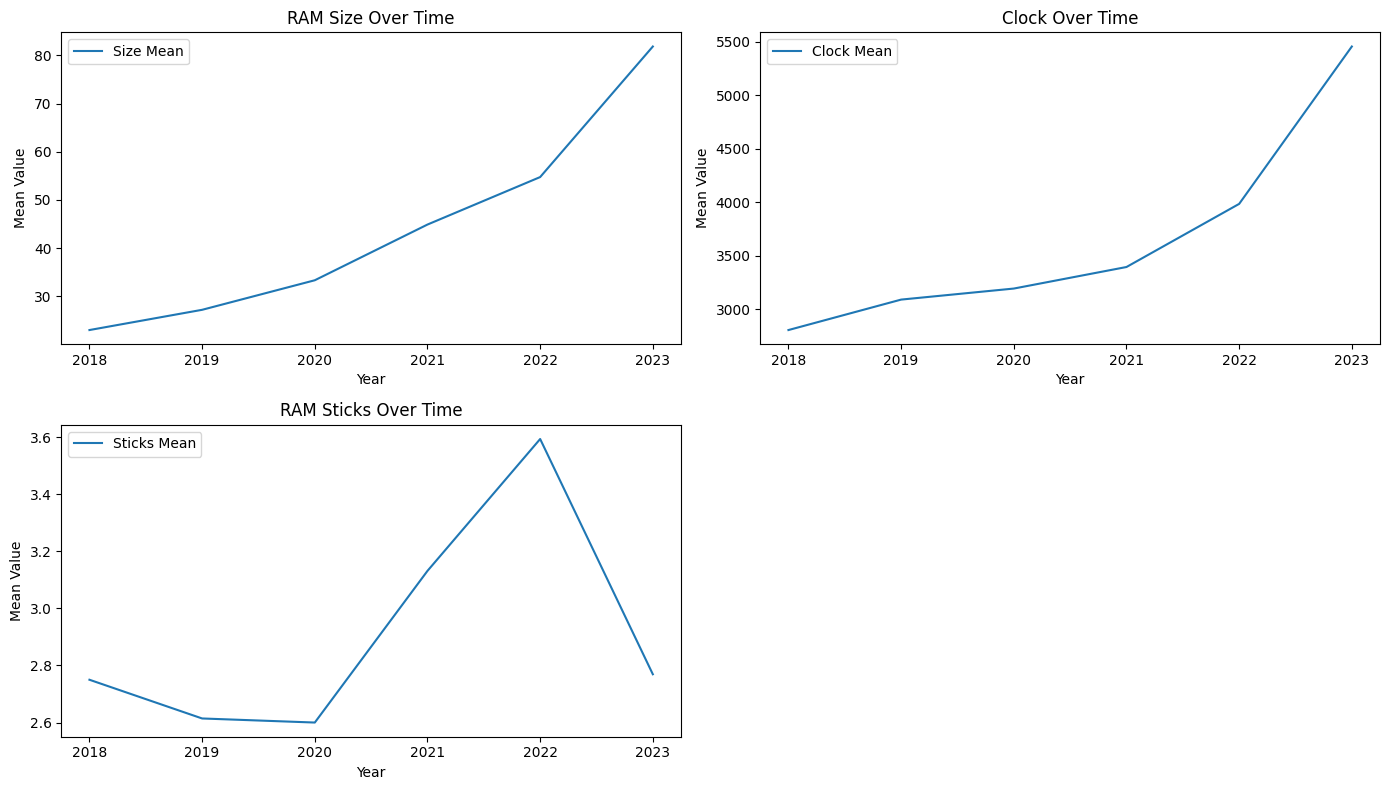

In [244]:

# Plotting the statistics
plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
plt.plot(df_stats_ram['Year'], df_stats_ram['Size_mean'], label="Size Mean")
plt.title('RAM Size Over Time')
plt.xlabel('Year')
plt.ylabel('Mean Value')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(df_stats_ram['Year'], df_stats_ram['Clock_mean'], label="Clock Mean")
plt.title('Clock Over Time')
plt.xlabel('Year')
plt.ylabel('Mean Value')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(df_stats_ram['Year'], df_stats_ram['Sticks_mean'], label="Sticks Mean")
plt.title('RAM Sticks Over Time')
plt.xlabel('Year')
plt.ylabel('Mean Value')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


PREDICTION VISUALIZATION 2018-2035 USING POLYNOMIAL REGRESSION

In this analysis, we applied polynomial regression to predict the future values of three key parameters: RAM Size, Clock Speed, and Number of RAM Sticks. The goal was to model the underlying trends over time and forecast future values based on historical data.

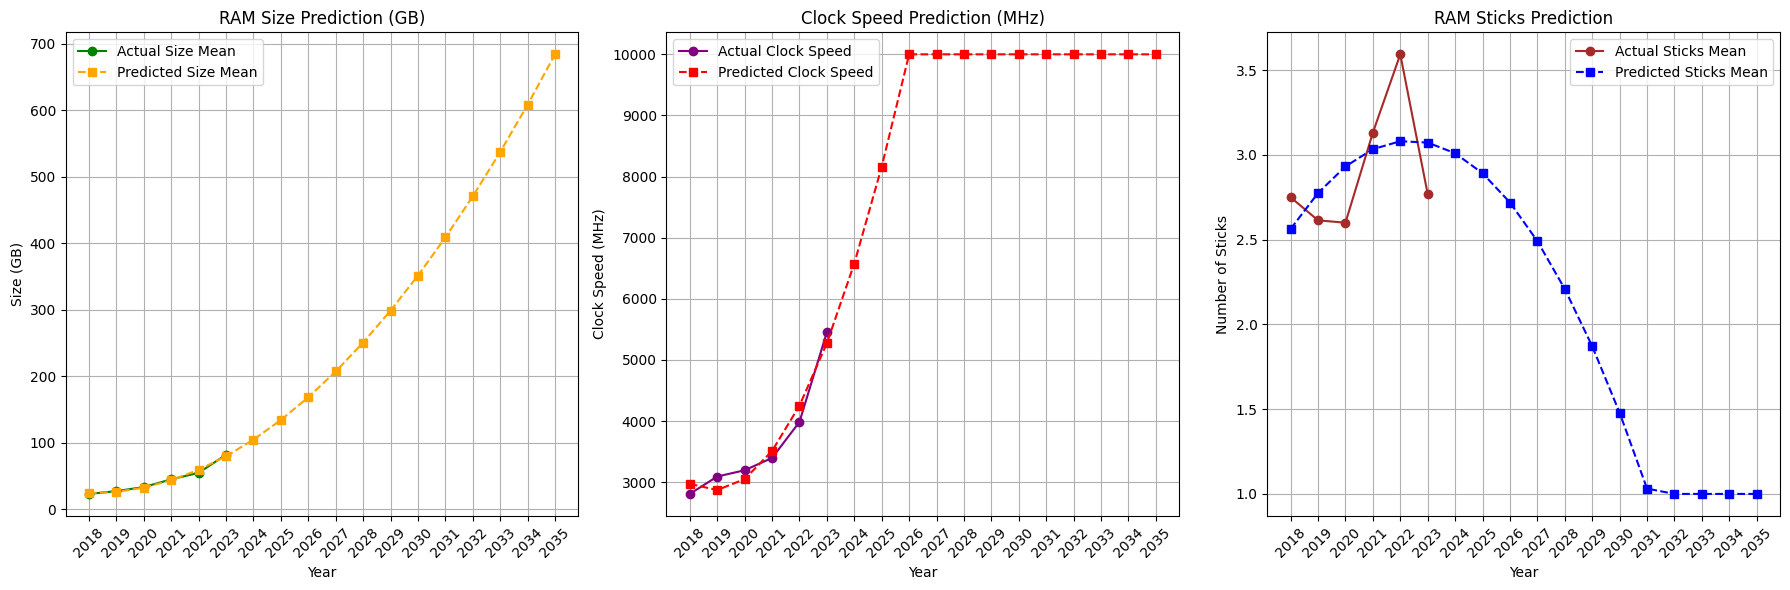

In [249]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Prepare data for polynomial regression
X = df_stats_ram['Year'].values.reshape(-1, 1)  

y_size = df_stats_ram['Size_mean'].values  
y_clock = df_stats_ram['Clock_mean'].values  
y_sticks = df_stats_ram['Sticks_mean'].values  

# Use a lower polynomial degree to avoid overfitting
degree = 2  
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)

# Fit polynomial regression models for each feature
model_size = LinearRegression().fit(X_poly, y_size)
model_clock = LinearRegression().fit(X_poly, y_clock)
model_sticks = LinearRegression().fit(X_poly, y_sticks)

# Predict values for future years
years_to_predict = np.arange(2018, 2036).reshape(-1, 1)
years_to_predict_poly = poly.transform(years_to_predict)

predicted_size = model_size.predict(years_to_predict_poly)
predicted_clock = model_clock.predict(years_to_predict_poly)
predicted_sticks = model_sticks.predict(years_to_predict_poly)

# Clip values to realistic limits
predicted_size = np.clip(predicted_size, 0, 1024)  # RAM size limit (GB)
predicted_clock = np.clip(predicted_clock, 1000, 10000)  # Clock speed limit (MHz)
predicted_sticks = np.clip(predicted_sticks, 1, 8)  # Sticks limit

# Adjust the figure size for side-by-side subplots
plt.figure(figsize=(18, 6))  # Make the overall figure wider

# RAM Size Prediction
plt.subplot(1, 3, 1)
plt.plot(df_stats_ram['Year'], df_stats_ram['Size_mean'], label="Actual Size Mean", color='green', marker='o')
plt.plot(years_to_predict, predicted_size, label="Predicted Size Mean", color='orange', linestyle='--', marker='s')
plt.xticks(years_to_predict.flatten(), rotation=45)
plt.title('RAM Size Prediction (GB)')
plt.xlabel('Year')
plt.ylabel('Size (GB)')
plt.legend()
plt.grid(True)

# Clock Speed Prediction
plt.subplot(1, 3, 2)
plt.plot(df_stats_ram['Year'], df_stats_ram['Clock_mean'], label="Actual Clock Speed", color='purple', marker='o')
plt.plot(years_to_predict, predicted_clock, label="Predicted Clock Speed", color='red', linestyle='--', marker='s')
plt.xticks(years_to_predict.flatten(), rotation=45)
plt.title('Clock Speed Prediction (MHz)')
plt.xlabel('Year')
plt.ylabel('Clock Speed (MHz)')
plt.legend()
plt.grid(True)

# RAM Sticks Prediction
plt.subplot(1, 3, 3)
plt.plot(df_stats_ram['Year'], df_stats_ram['Sticks_mean'], label="Actual Sticks Mean", color='brown', marker='o')
plt.plot(years_to_predict, predicted_sticks, label="Predicted Sticks Mean", color='blue', linestyle='--', marker='s')
plt.xticks(years_to_predict.flatten(), rotation=45)
plt.title('RAM Sticks Prediction')
plt.xlabel('Year')
plt.ylabel('Number of Sticks')
plt.legend()
plt.grid(True)

# Adjust layout to avoid overlapping
plt.tight_layout()

# Show the plot
plt.show()
